In [1]:
from mcnpy.cov.parse_covmat import read_scale_covmat, read_njoy_covmat

In [2]:
scale_file_path = 'files/scale.rev05.44groupcov.txt'

In [3]:
covmat = read_scale_covmat(scale_file_path)

In [ ]:
cov_Mn55 = covmat.filter_by_isotope(25055)

In [5]:
cov_Mn55.verify_correlation()

In [16]:
clean_covmat = covmat.clean_cov(8016)

In [17]:
df = clean_covmat.to_dataframe()
df

,ISO_H,REAC_H,ISO_V,REAC_V,STD
0,0,0,0,0,"[1e-11, 3e-09, 7.5e-09, 1e-08, 2.53e-08, 3e-08..."
1,8016,2,8016,2,"[[0.00010003, 0.00010002, 0.00010002, 0.000100..."
2,8016,2,8016,102,"[[-1.2999e-06, -9.3556002e-07, -7.6894997e-07,..."
3,8016,4,8016,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,8016,4,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,8016,4,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,8016,4,8016,102,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,8016,16,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,8016,102,8016,102,"[[0.0099999998, 0.0099999998, 0.0099999998, 0...."
9,8016,103,8016,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [18]:
full_covmat = clean_covmat.covariance_matrix
print(full_covmat.shape)

(352, 352)


In [19]:
result = clean_covmat.analyze_covariance(tol=1e-6)

if not result["is_symmetric"]:
    print(f"Asymmetry: max |M–M^T| = {result['max_sym_diff']:.2e}")

if result["num_negative_diag"] > 0:
    for bad in result["negative_diagonals"]:
        print(
            f"Diagonal <0 in block (iso={bad['isotope']}, rxn={bad['reaction']}), "
            f"group {bad['group']}: {bad['value']:.2e}"
        )

if result["negative_eigenvalues"]:
    print("Eigenvalues below -tol:", result["negative_eigenvalues"])

Eigenvalues below -tol: [-0.0001680226541241573]


In [21]:
# Run the diagnosis
diag = clean_covmat.diagnose_negative_eigenvalues(eig_tol=1e-6, top_n=3)

# Inspect results
for eig_key, blocks in diag.items():
    print(f"Eigenvalue {eig_key} has top-negative-blocks:")
    for b in blocks:
        (iso_a, rxn_a), (iso_b, rxn_b) = b['block']
        print(f"  Block ({iso_a}-{rxn_a}, {iso_b}-{rxn_b}): {b['contribution']:.2e}")

Eigenvalue eigen_0_-1.68e-04 has top-negative-blocks:
  Block (8016-2, 8016-4): -2.22e-04
  Block (8016-4, 8016-2): -2.22e-04
  Block (8016-4, 8016-102): -1.55e-12


In [ ]:
df_clean = clean_covmat.to_dataframe()
df_clean

,ISO_H,REAC_H,ISO_V,REAC_V,STD
0,0,0,0,0,"[1e-11, 3e-09, 7.5e-09, 1e-08, 2.53e-08, 3e-08..."
1,8016,2,8016,2,"[[0.00010003, 0.00010002, 0.00010002, 0.000100..."
2,8016,16,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,8016,102,8016,102,"[[0.0099999998, 0.0099999998, 0.0099999998, 0...."
4,8016,103,8016,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,8016,104,8016,104,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,8016,107,8016,107,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,8016,4,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,8016,105,8016,105,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,8016,2,8016,102,"[[-1.2999e-06, -9.3556002e-07, -7.6894997e-07,..."


In [ ]:
df = covmat.to_dataframe()
df[df['ISO_H'] == 8016]

,ISO_H,REAC_H,ISO_V,REAC_V,STD
103,8016,2,8016,2,"[[0.00010003, 0.00010002, 0.00010002, 0.000100..."
104,8016,16,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
105,8016,102,8016,102,"[[0.0099999998, 0.0099999998, 0.0099999998, 0...."
106,8016,103,8016,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
107,8016,104,8016,104,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
108,8016,107,8016,107,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
109,8016,4,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
110,8016,105,8016,105,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
111,8016,2,8016,102,"[[-1.2999e-06, -9.3556002e-07, -7.6894997e-07,..."
112,8016,4,8016,2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
clean_covmat.get_isotope_reactions()[8016]

{2, 4, 16, 102, 103, 104, 105, 107}

In [ ]:
print(clean_covmat.get_isotope_reactions()[8016])
print(clean_covmat.get_isotope_reactions()[8016])

{2, 4, 102, 103, 104, 105, 107, 16}
{2, 4, 102, 103, 104, 105, 107, 16}


In [ ]:
report = covmat.validate(verbose=True)

Validation report – failures:
   [PSD] iso 8001001 MT 2: λ_min=-7.488e-09 < −3.242e-11
   [PSD] iso 8001001 MT 102: λ_min=-1.045e-05 < −1.724e-08
   [PSD] iso 8001002 MT 2: λ_min=-7.531e-09 < −1.560e-10
   [PSD] iso 8001002 MT 102: λ_min=-2.496e-06 < −4.772e-08
   [C‑S] iso 8001002/8001002 MT 16/2 g 1/40: |cov|=-7.986e-03 > bound=0.000e+00
   [C‑S] iso 8001002/8001002 MT 16/2 g 1/41: |cov|=-9.761e-03 > bound=0.000e+00
   [C‑S] iso 8001002/8001002 MT 16/2 g 1/42: |cov|=-7.279e-03 > bound=0.000e+00
   [C‑S] iso 8001002/8001002 MT 16/2 g 1/43: |cov|=-1.883e-03 > bound=0.000e+00
   [C‑S] iso 8001002/8001002 MT 16/2 g 2/40: |cov|=-7.986e-03 > bound=0.000e+00
   [C‑S] iso 8001002/8001002 MT 16/2 g 2/41: |cov|=-9.761e-03 > bound=0.000e+00
   [C‑S] iso 8001002/8001002 MT 16/2 g 2/42: |cov|=-7.279e-03 > bound=0.000e+00
   [C‑S] iso 8001002/8001002 MT 16/2 g 2/43: |cov|=-1.883e-03 > bound=0.000e+00
   [C‑S] iso 8001002/8001002 MT 16/2 g 3/40: |cov|=-7.986e-03 > bound=0.000e+00
   [C‑S] iso 80010

In [ ]:
covmat

                            Covariance Matrix Information                            

This object contains covariance matrix data from nuclear data files (SCALE, NJOY, etc).
Each matrix represents the covariance between cross sections for specific
isotope-reaction pairs across energy groups.

Covariance type: SCALE

Covariance Data Summary:
-------------------------------------------------------------------------------------
Property                            Value                                          
-------------------------------------------------------------------------------------
Number of Energy Groups             44                                             
Number of Covariance Matrices       2235                                           
Number of Unique Isotopes           407                                            
Number of Unique Reactions          12                                             
----------------------------------------------------------------

In [ ]:
import numpy as np

N, M = 44, 2
A = np.random.rand(M*N, M*N)   # tu array 88×88
type(A)
print(A.shape)

(88, 88)


In [ ]:
for i in range(M):
    for j in range(M):
        # extraemos el bloque (i,j) de 44×44
        bloque = A[i*N:(i+1)*N, j*N:(j+1)*N]
        # lo invertimos en filas y columnas
        A[i*N:(i+1)*N, j*N:(j+1)*N] = np.flip(bloque, axis=(0,1))


In [ ]:
A

array([[0.61741589, 0.81561891, 0.78919676, ..., 0.21169361, 0.42786662,
        0.26320667],
       [0.82104505, 0.17479713, 0.87705111, ..., 0.51208451, 0.35347584,
        0.10559319],
       [0.64442552, 0.4084052 , 0.65065305, ..., 0.40465875, 0.53540086,
        0.16012241],
       ...,
       [0.22190376, 0.02066794, 0.51003399, ..., 0.64776197, 0.26434451,
        0.37438112],
       [0.97176838, 0.79424519, 0.26620791, ..., 0.19646995, 0.20847047,
        0.22441898],
       [0.05772804, 0.45161683, 0.81430818, ..., 0.8607335 , 0.91377944,
        0.94070159]], shape=(88, 88))

In [ ]:
df = covmat.to_dataframe()
df

,ISO_H,REAC_H,ISO_V,REAC_V,STD
0,0,0,0,0,"[1e-11, 3e-09, 7.5e-09, 1e-08, 2.53e-08, 3e-08..."
1,8001001,2,8001001,2,"[[1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e-06, 1e..."
2,8001001,102,8001001,102,"[[2.4999999e-05, 2.4999999e-05, 2.4999999e-05,..."
3,8001002,2,8001002,2,"[[0.00039999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,8001002,102,8001002,102,"[[0.00089999998, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...
2231,22048,2,22048,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2232,22048,2,22048,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2233,22048,2,22048,102,"[[-3.794489e-05, -4.2001837e-05, -4.2837644e-0..."
2234,22048,2,22048,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
df[df['REAC_H'] == 103]

,ISO_H,REAC_H,ISO_V,REAC_V,STD
13,2003,103,2003,103,"[[2.4999999e-05, 2.4999999e-05, 2.4999999e-05,..."
22,3006,103,3006,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
31,4009,103,4009,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
44,5010,103,5010,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
56,5011,103,5011,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
69,6000,103,6000,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
81,7014,103,7014,103,"[[0.00040013, 0.00040014999, 0.00040009001, 0...."
91,7015,103,7015,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
106,8016,103,8016,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
119,8017,103,8017,103,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [1]:
from mcnpy.cov.parse_covmat import read_scale_covmat, read_njoy_covmat
from mcnpy.cov.plotting import plot_uncertainties, compare_uncertainties
import numpy as np

In [2]:
scale_file_path = 'files/scale.rev08.56groupcov7.1.txt'

In [3]:
covmat = read_scale_covmat(scale_file_path)

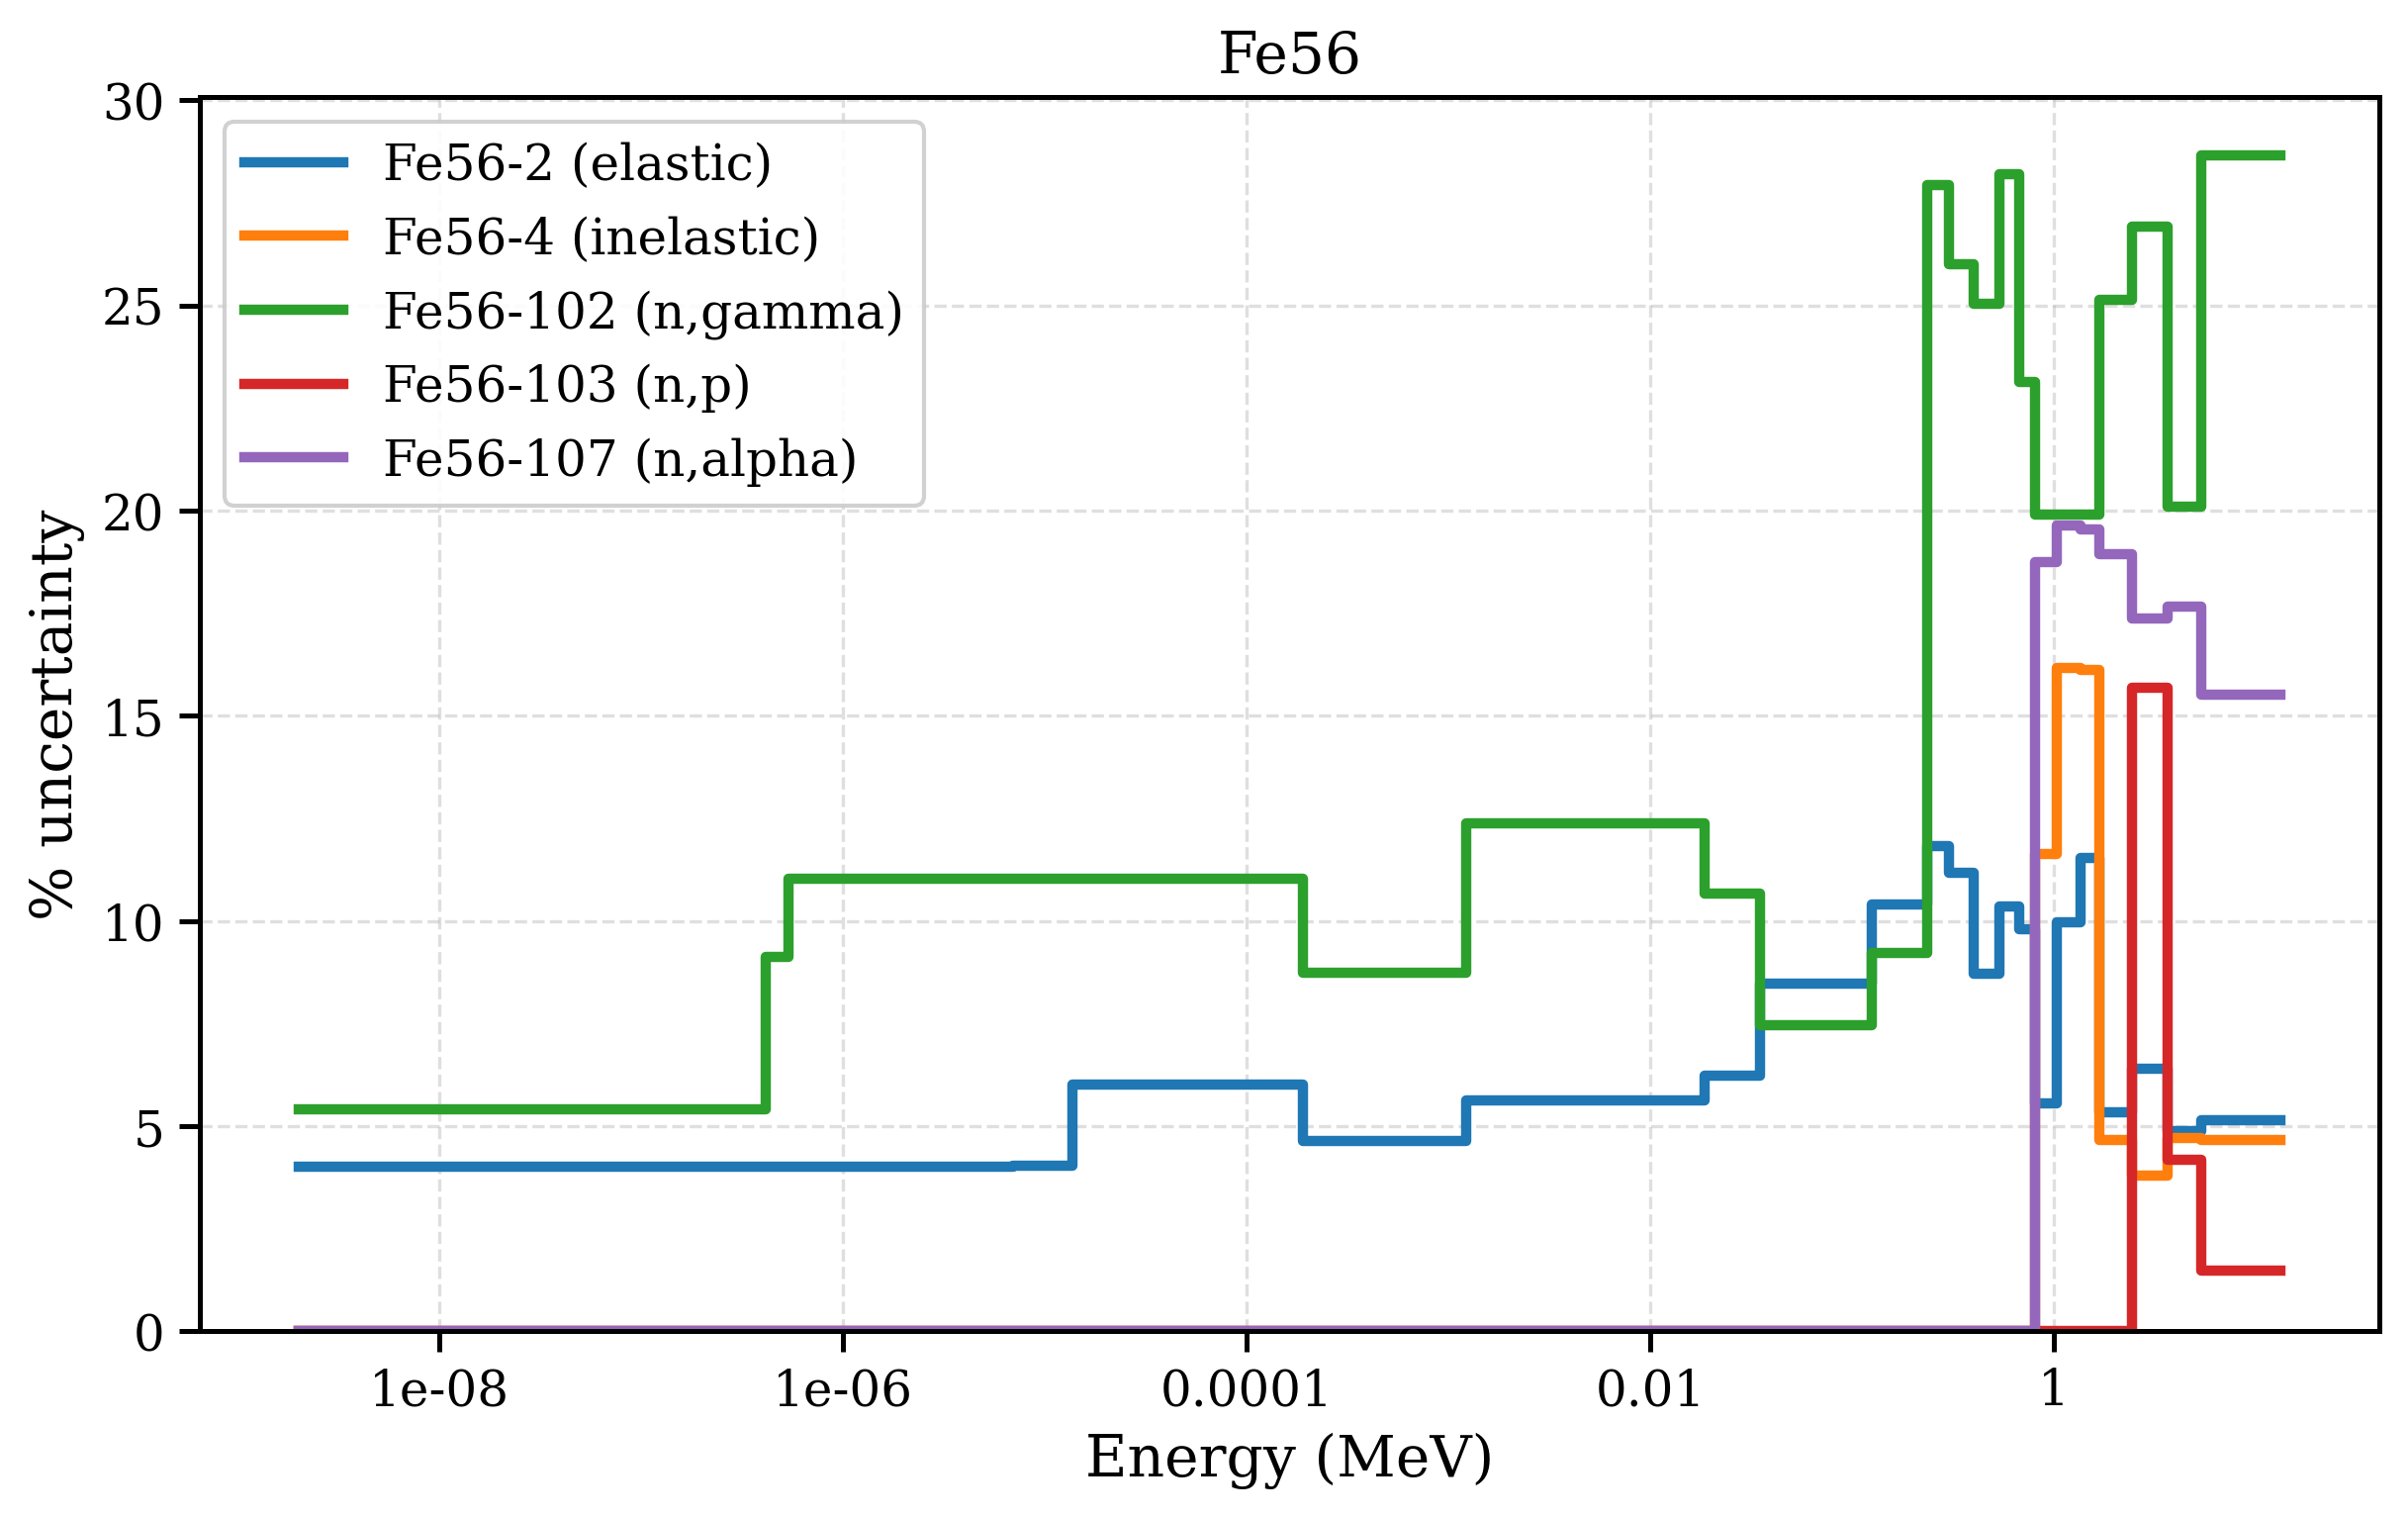

<Axes: title={'center': 'Fe56'}, xlabel='Energy (MeV)', ylabel='% uncertainty'>

In [8]:
covmat.plot_uncertainties(26056, [2,4,102,103,107], style='default')

In [4]:
cov_Fe56_file   = '/soft_snc/lib/cov/80/600/260560_80.06.xs.gendf'

cov_Fe56 = read_njoy_covmat(cov_Fe56_file)

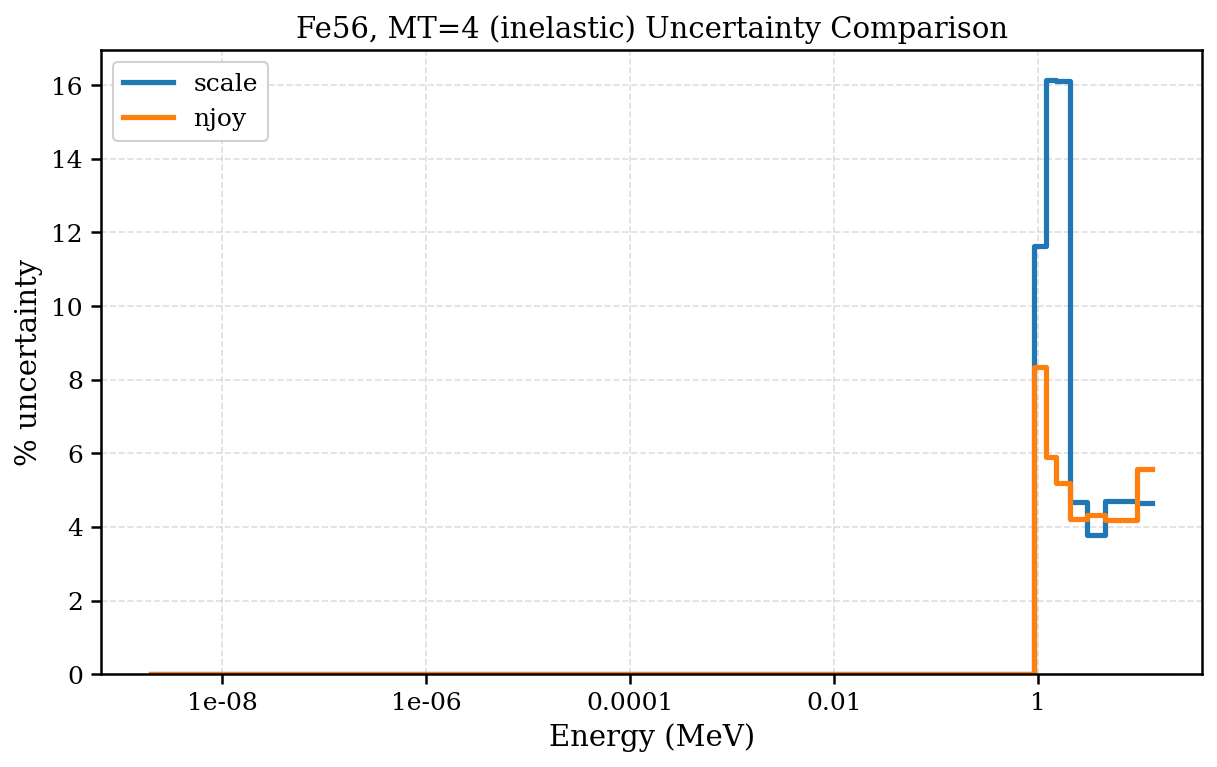

<Axes: title={'center': 'Fe56, MT=4 (inelastic) Uncertainty Comparison'}, xlabel='Energy (MeV)', ylabel='% uncertainty'>

In [5]:
compare_uncertainties([covmat, cov_Fe56], 26056, mt=4, labels=['scale', 'njoy'], style='default')

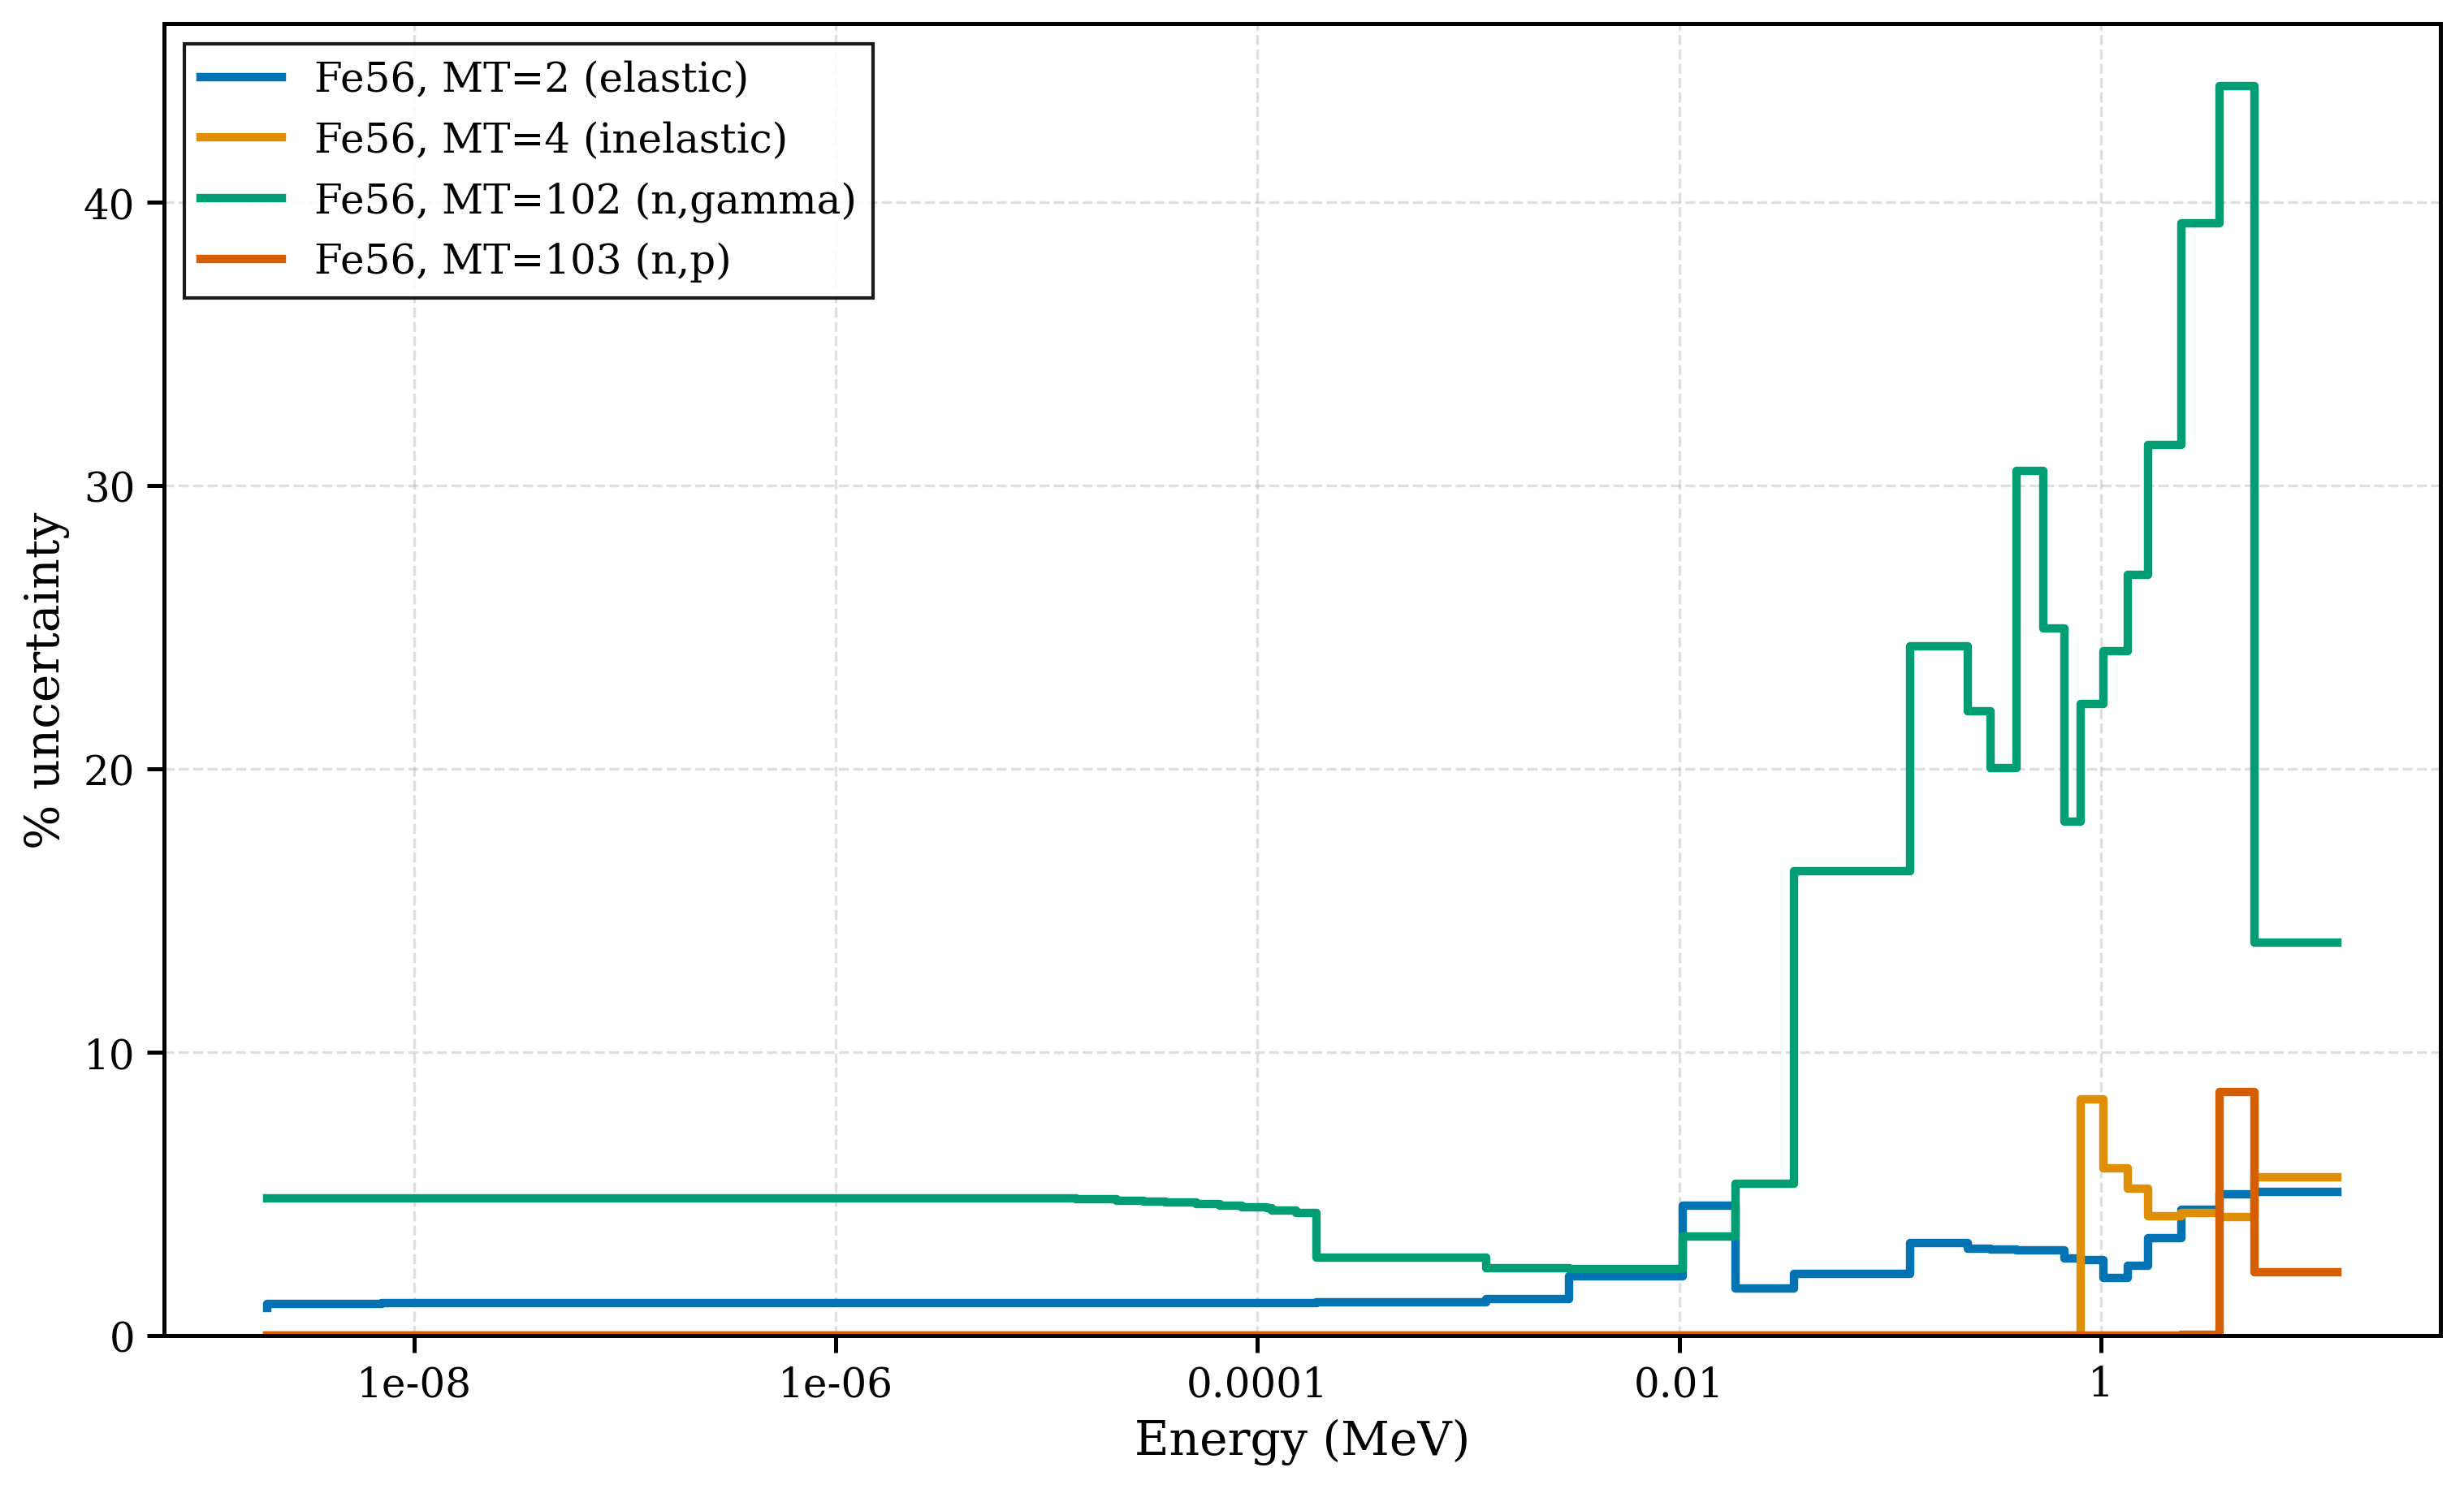

<Axes: xlabel='Energy (MeV)', ylabel='% uncertainty'>

In [6]:
plot_uncertainties(cov_Fe56, 26056, [2,4,102,103,107], style='paper')

In [13]:
cov_O16_file   = '/soft_snc/lib/cov/80/600/80160_80.06.xs.gendf'

cov_O16 = read_njoy_covmat(cov_O16_file)

In [12]:
cov_O16 = cov_O16.clean_cov(8016)

In [14]:
cov_fixed, fix_log = cov_O16.fix_covariance(level='soft')

  [STEP 01] [CLAMP] MT=  4 G=54 variance 8.61397e+16 → 1
    cov(MT=  4, G=54; MT=  1, G= 0)  -2.3750e+03 →  -8.0922e-06
    cov(MT=  4, G=54; MT=  1, G= 1)  -2.3751e+03 →  -8.0924e-06
    cov(MT=  4, G=54; MT=  1, G= 2)  -2.3751e+03 →  -8.0925e-06
    cov(MT=  4, G=54; MT=  1, G= 3)  -2.3752e+03 →  -8.0926e-06
    cov(MT=  4, G=54; MT=  1, G= 4)  -2.3752e+03 →  -8.0927e-06
    cov(MT=  4, G=54; MT=  1, G= 5)  -2.3752e+03 →  -8.0927e-06
    cov(MT=  4, G=54; MT=  1, G= 6)  -2.3752e+03 →  -8.0928e-06
    cov(MT=  4, G=54; MT=  1, G= 7)  -2.3752e+03 →  -8.0928e-06
    cov(MT=  4, G=54; MT=  1, G= 8)  -2.3752e+03 →  -8.0928e-06
    cov(MT=  4, G=54; MT=  1, G= 9)  -2.3752e+03 →  -8.0928e-06
    cov(MT=  4, G=54; MT=  1, G=10)  -2.3752e+03 →  -8.0929e-06
    cov(MT=  4, G=54; MT=  1, G=11)  -2.3752e+03 →  -8.0929e-06
    cov(MT=  4, G=54; MT=  1, G=12)  -2.3752e+03 →  -8.0929e-06
    cov(MT=  4, G=54; MT=  1, G=13)  -2.3752e+03 →  -8.0929e-06
    cov(MT=  4, G=54; MT=  1, G=14)  -2.3752e+0

In [7]:
plot_uncertainties(cov_fixed, 8016, [102])

NameError: name 'cov_fixed' is not defined

In [7]:
cov_fixed.diagnose_negative_eigenvalues()

{'eigen_0_-4.00e-02': [{'block': ((8016, 4), (8016, 2)),
   'contribution': -0.03901746807426311},
  {'block': ((8016, 2), (8016, 4)), 'contribution': -0.0390174680742631},
  {'block': ((8016, 102), (8016, 4)), 'contribution': -2.6053389084050935e-06},
  {'block': ((8016, 4), (8016, 102)), 'contribution': -2.605338908405093e-06},
  {'block': ((8016, 4), (8016, 22)), 'contribution': -2.0336202828469814e-09}]}

In [15]:
cov_fixed.analyze_covariance()

{'is_symmetric': np.True_,
 'max_sym_diff': 0.0,
 'negative_diagonals': [],
 'min_diagonal': 0.0,
 'num_negative_diag': 0,
 'negative_eigenvalues': [-0.040032555424905754],
 'min_eigenvalue': -0.040032555424905754}

In [11]:
cov_fixed.eigen_block_contributions();

Eigenvalue block contributions (idx=0, λ=-4.0033e-02)
Top 10 block contributions (tol=1e-12, symmetric=True, relative=False):
--------------------------------------------------------------------------------
Block (iso,rxn)-(iso,rxn)              Contribution
--------------------------------------------------------------------------------
(8016,2)-(8016,4)                     -3.901747e-02
(8016,4)-(8016,4)                      3.745793e-02
(8016,2)-(8016,2)                      5.470994e-04
(8016,4)-(8016,102)                   -2.605339e-06
(8016,102)-(8016,102)                  2.564601e-06
(8016,4)-(8016,22)                    -2.033620e-09
(8016,22)-(8016,22)                    8.219049e-10


In [10]:
cov_fixed.eigen_block_contributions(relative=True);

Eigenvalue block contributions (idx=0, λ=-4.0033e-02)
Top 10 block contributions (tol=1e-12, symmetric=True, relative=True):
--------------------------------------------------------------------------------
Block (iso,rxn)-(iso,rxn)              Contribution      |c|/|λ|
--------------------------------------------------------------------------------
(8016,2)-(8016,4)                     -3.901747e-02   9.7464e-01
(8016,4)-(8016,4)                      3.745793e-02   9.3569e-01
(8016,2)-(8016,2)                      5.470994e-04   1.3666e-02
(8016,4)-(8016,102)                   -2.605339e-06   6.5081e-05
(8016,102)-(8016,102)                  2.564601e-06   6.4063e-05
(8016,4)-(8016,22)                    -2.033620e-09   5.0799e-08
(8016,22)-(8016,22)                    8.219049e-10   2.0531e-08


In [5]:
cov_O16.svd_decomposition(space='log')

/home/MONLEON-JUAN/MCNPy/mcnpy/cov/covmat.py:407: RuntimeWarning: invalid value encountered in log1p
  Sigma_log = np.log1p(cov_rel)


  [INFO] No negative eigenvalues; direct SVD applied.


LinAlgError: SVD did not converge

In [6]:
cov_O16.check_relative_bounds()

Found value 2.5320e+05 for (8016, 1) (8016, 4) energy groups (row 47, col 54)
Found value 2.5953e+05 for (8016, 1) (8016, 4) energy groups (row 48, col 54)
Found value 2.5321e+05 for (8016, 2) (8016, 4) energy groups (row 47, col 54)
Found value 2.5954e+05 for (8016, 2) (8016, 4) energy groups (row 48, col 54)
Found value 8.6140e+16 for (8016, 4) (8016, 4) energy groups (row 54, col 54)
Found value 7.8438e+06 for (8016, 4) (8016, 4) energy groups (row 54, col 55)
Found value 7.8438e+06 for (8016, 4) (8016, 4) energy groups (row 55, col 54)


In [8]:
cov_O16.verify_correlation()

Found value -5.9080e+00 for (8016,1) (8016,4) energy group 54. Value should be [-1,1] for an off-diagonal element.
Found value -8.4596e+00 for (8016,1) (8016,4) energy group 55. Value should be [-1,1] for an off-diagonal element.
Found value -5.9130e+00 for (8016,2) (8016,4) energy group 54. Value should be [-1,1] for an off-diagonal element.
Found value -8.7797e+00 for (8016,2) (8016,4) energy group 55. Value should be [-1,1] for an off-diagonal element.
Found value -5.9080e+00 for (8016,4) (8016,1) energy group 55. Value should be [-1,1] for an off-diagonal element.
Found value -8.4596e+00 for (8016,4) (8016,1) energy group 55. Value should be [-1,1] for an off-diagonal element.
Found value -5.9130e+00 for (8016,4) (8016,2) energy group 55. Value should be [-1,1] for an off-diagonal element.
Found value -8.7797e+00 for (8016,4) (8016,2) energy group 55. Value should be [-1,1] for an off-diagonal element.


In [8]:
cov_Mn55_file   = '/soft_snc/lib/cov/80/600/250550_80.06.xs.gendf'

cov_Mn55 = read_njoy_covmat(cov_Mn55_file)

In [10]:
cov_Mn55.check_relative_bounds()

Found value 1.3993e+00 for (25055, 1) (25055, 856) energy groups (row 55, col 55)
Found value 2.4323e+00 for (25055, 102) (25055, 102) energy groups (row 54, col 54)
Found value 2.4459e+00 for (25055, 102) (25055, 102) energy groups (row 54, col 55)
Found value 2.4459e+00 for (25055, 102) (25055, 102) energy groups (row 55, col 54)
Found value 2.8573e+00 for (25055, 102) (25055, 102) energy groups (row 55, col 55)
Found value 1.0966e+00 for (25055, 102) (25055, 856) energy groups (row 52, col 55)
Found value 1.3443e+00 for (25055, 102) (25055, 856) energy groups (row 53, col 55)
Found value 2.4002e+01 for (25055, 102) (25055, 856) energy groups (row 54, col 55)
Found value 3.6200e+01 for (25055, 102) (25055, 856) energy groups (row 55, col 55)
Found value 1.0590e+00 for (25055, 851) (25055, 856) energy groups (row 55, col 55)
Found value 3.9306e+00 for (25055, 852) (25055, 856) energy groups (row 54, col 55)
Found value 1.3475e+00 for (25055, 852) (25055, 856) energy groups (row 55, co

In [11]:
cov_Mn55.verify_correlation()

In [10]:
cov_Fe56_file   = '/soft_snc/lib/cov/80/600/260560_80.06.xs.gendf'

cov_Fe56 = read_njoy_covmat(cov_Fe56_file)

In [11]:
cov_Fe56.check_relative_bounds()

All relative covariance values are ≤ 1.0.


In [12]:
cov_Fe56.verify_correlation()

In [13]:
cov_O16 = cov_O16.clean_cov(8016)

In [37]:
cov = cov_O16.sanitize_by_correlation_og()


[ sanitize_by_correlation ]
  smallest 5 eigenvalues BEFORE      : -3.522e+01 -2.310e+01 -2.125e+01 -1.843e+01 -1.607e+01
  |ρ|>max : (8016,1)-g54 vs (8016,4)-g55   -5.908e+00 → -1.000e+00
  |ρ|>max : (8016,1)-g55 vs (8016,4)-g55   -8.460e+00 → -1.000e+00
  |ρ|>max : (8016,2)-g54 vs (8016,4)-g55   -5.913e+00 → -1.000e+00
  |ρ|>max : (8016,2)-g55 vs (8016,4)-g55   -8.780e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,1)-g54   -5.908e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,1)-g55   -8.460e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,2)-g54   -5.913e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,2)-g55   -8.780e+00 → -1.000e+00
  smallest 5 eigenvalues AFTER clip : -3.084e+01 -2.869e+01 -2.711e+01 -2.434e+01 -2.418e+01
  PSD-proj: 707 eigenvalues < 0, floored to 1.0e-12
  smallest 5 eigenvalues AFTER PSD  : +1.000e-12 +1.000e-12 +1.000e-12 +1.000e-12 +1.000e-12


In [33]:
df = cov_O16.to_dataframe()
print(df[(df['REAC_H'] == 2) & (df['REAC_V'] == 2)]['STD'])
print(df[(df['REAC_H'] == 2) & (df['REAC_V'] == 4)]['STD'])
print(df[(df['REAC_H'] == 4) & (df['REAC_V'] == 4)]['STD'])

6    [[2.83395e-06, 2.83395e-06, 2.83395e-06, 2.833...
Name: STD, dtype: object
7    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: STD, dtype: object
8    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: STD, dtype: object


In [40]:
df = cov_O16.to_dataframe()
print(df[(df['REAC_H'] == 2) & (df['REAC_V'] == 2)]['STD'][6][-1][-2])
print(df[(df['REAC_H'] == 2) & (df['REAC_V'] == 4)]['STD'][7][0][-2])
print(df[(df['REAC_H'] == 4) & (df['REAC_V'] == 4)]['STD'][8][-1][-2])

1.852848e-05
-2375.241
7843801.42


In [41]:
-2375.241/(np.sqrt(1.852848e-05*7843801.42))

np.float64(-197.02643059298921)

In [38]:
df = cov.to_dataframe()
print(df[(df['REAC_H'] == 2) & (df['REAC_V'] == 2)]['STD'])
print(df[(df['REAC_H'] == 2) & (df['REAC_V'] == 4)]['STD'])
print(df[(df['REAC_H'] == 4) & (df['REAC_V'] == 4)]['STD'])

6    [[0.008047670746960106, 0.00804767074595964, 0...
Name: STD, dtype: object
7    [[3.3150908411957067e-29, 5.777003619413929e-2...
Name: STD, dtype: object
8    [[1.0000000000000004e-12, 3.492070897332416e-2...
Name: STD, dtype: object


In [39]:
df = cov.to_dataframe()
print(df[(df['REAC_H'] == 2) & (df['REAC_V'] == 2)]['STD'][6][0][-2])
print(df[(df['REAC_H'] == 2) & (df['REAC_V'] == 4)]['STD'][7][0][-2])
print(df[(df['REAC_H'] == 4) & (df['REAC_V'] == 4)]['STD'][8][0][-2])

-0.0004371281678575747
-2375.252397328122
1.4598828330796954e-42


In [19]:
df = cov.to_dataframe()
print(df[(df['REAC_H'] == 2) & (df['REAC_V'] == 4)]['STD'][2])

for lista in df[(df['REAC_H'] == 2) & (df['REAC_V'] == 4)]['STD'][2]:
    for i in lista:
        if not np.isclose(i, 0.0, atol=1e-1):
            print(i)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2375.240999999997, 9.724622513845346e-08], [4.633625735145643e-28, -1.313392623920644e-28, -9.19686531761538e-29, -1.0806997280928511e-30, 5.369196188542138e-32, -1.1545168062319469e-32, 3.19355303978508e-31, 3.2260358387243608e-31, -3.2415033234370567e-31, 1.1009486231468744e-41, 2.283175764720218e-41, -2.1762594124855223e-41, 7.106999915028547e-42, -1.2863838630637305e-41, -1.7896969175590856e-41, 2.5920150166060047e-42, -1.579559239655309e-41, -2.8350030956762702e-42, 1.2907563680039252e-41, 6.94619985932495e-43, -1.0487337308697653e-42, 1.2114661799639837e-41, -3.178137637507667e-41, 9.18011780172149e-42, -9.726292539196957e-42, 1.0901816728858303e-43, -1.3698097100477187e-41, -1.138129145726521e-41, -4.1703155823

[ sanitize_by_correlation ]
  smallest 5 eigenvalues BEFORE      : -3.526e+01 -3.240e+01 -2.712e+01 -2.234e+01 -1.441e+01
  |ρ|>max : (8016,2)-g54 vs (8016,4)-g55   -5.913e+00 → -1.000e+00
  |ρ|>max : (8016,2)-g55 vs (8016,4)-g55   -8.780e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,2)-g54   -5.913e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,2)-g55   -8.780e+00 → -1.000e+00
  smallest 5 eigenvalues AFTER clip : -2.870e+01 -2.721e+01 -2.062e+01 -2.002e+01 -1.961e+01
  PSD-proj: 140 eigenvalues < 0, floored to 1.0e-12
  smallest 5 eigenvalues AFTER PSD  : +1.000e-12 +1.000e-12 +1.000e-12 +1.000e-12 +1.000e-12

In [12]:
w, V = np.linalg.eigh(cov.covariance_matrix)
idx = w.argmin()
troubled_bins = np.abs(V[:, idx]).argsort()[-10:]  # ten largest comps
prob_list = list(troubled_bins[::-1])

G = cov_O16.num_groups
pairs = cov_O16._get_param_pairs()        # [(8016,1), (8016,2), (8016,4), …]

for i in prob_list:
    block, g = divmod(i, G)               # integer division and remainder
    iso, rxn = pairs[block]
    print(f"index {i:02d}:  ({iso},{rxn})  group {g+1}")

index 32:  (8016,2)  group 33
index 31:  (8016,2)  group 32
index 16:  (8016,2)  group 17
index 18:  (8016,2)  group 19
index 30:  (8016,2)  group 31
index 19:  (8016,2)  group 20
index 11:  (8016,2)  group 12
index 28:  (8016,2)  group 29
index 34:  (8016,2)  group 35
index 33:  (8016,2)  group 34


In [ ]:
cov_O16_file   = '/soft_snc/lib/cov/80/600/80160_80.06.xs.gendf'

cov_O16 = read_njoy_covmat(cov_O16_file)

In [ ]:
sanity_cov = cov_O16.sanitize_by_correlation(in_place=True)


[ sanitize_by_correlation ]
  smallest 5 eigenvalues BEFORE      : -3.522e+01 -2.310e+01 -2.125e+01 -1.843e+01 -1.607e+01
  |ρ|>max : (8016,1)-g54 vs (8016,4)-g55   -5.908e+00 → -1.000e+00
  |ρ|>max : (8016,1)-g55 vs (8016,4)-g55   -8.460e+00 → -1.000e+00
  |ρ|>max : (8016,2)-g54 vs (8016,4)-g55   -5.913e+00 → -1.000e+00
  |ρ|>max : (8016,2)-g55 vs (8016,4)-g55   -8.780e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,1)-g54   -5.908e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,1)-g55   -8.460e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,2)-g54   -5.913e+00 → -1.000e+00
  |ρ|>max : (8016,4)-g55 vs (8016,2)-g55   -8.780e+00 → -1.000e+00
  smallest 5 eigenvalues AFTER clip : -3.084e+01 -2.869e+01 -2.711e+01 -2.434e+01 -2.418e+01
  PSD-proj: 707 eigenvalues < 0, floored to 1.0e-12
  smallest 5 eigenvalues AFTER PSD  : +1.000e-12 +1.000e-12 +1.000e-12 +1.000e-12 +1.000e-12


In [3]:
clean_cov = cov_O16.clean_cov(8016)

In [4]:
full_cov = clean_cov.covariance_matrix
print(full_cov.shape)

(1568, 1568)


In [5]:
result = clean_cov.analyze_covariance(tol=1e-6)

if not result["is_symmetric"]:
    print(f"Asymmetry: max |M–M^T| = {result['max_sym_diff']:.2e}")

if result["num_negative_diag"] > -0:
    for bad in result["negative_diagonals"]:
        print(
            f"Diagonal <0 in block (iso={bad['isotope']}, rxn={bad['reaction']}), "
            f"group {bad['group']}: {bad['value']:.2e}"
        )

if result["negative_eigenvalues"]:
    print("Eigenvalues below -tol:", result["negative_eigenvalues"])

Eigenvalues below -tol: [-35.261111474383114, -32.4021674121441, -27.120007572998247, -22.336255845992145, -14.41374470238389, -12.767589053945851, -11.847565860923815, -7.730865158242828, -6.709245675037186, -5.701685634007251, -3.8802416339693604, -2.641396559969088, -1.510127965348209, -0.6445545164639406, -0.34262858898571374, -0.2246778912852911, -0.10842098551430887, -0.04106237459569077]


In [7]:
# Run the diagnosis
diag = clean_cov.diagnose_negative_eigenvalues(eig_tol=1e-6, top_n=2)

# Inspect results
for eig_key, blocks in diag.items():
    print(f"Eigenvalue {eig_key} has top-negative-blocks:")
    for b in blocks:
        (iso_a, rxn_a), (iso_b, rxn_b) = b['block']
        print(f"  Block ({iso_a}-{rxn_a}, {iso_b}-{rxn_b}): {b['contribution']:.2e}")

Eigenvalue eigen_0_-4.20e+01 has top-negative-blocks:
  Block (8016-2, 8016-4): -4.45e-06
  Block (8016-4, 8016-2): -4.45e-06
Eigenvalue eigen_1_-3.24e+01 has top-negative-blocks:
  Block (8016-2, 8016-4): -2.81e-06
  Block (8016-4, 8016-2): -2.81e-06
Eigenvalue eigen_2_-2.23e+01 has top-negative-blocks:
  Block (8016-2, 8016-4): -1.62e-05
  Block (8016-4, 8016-2): -1.62e-05
Eigenvalue eigen_3_-1.67e+01 has top-negative-blocks:
  Block (8016-4, 8016-2): -3.53e-06
  Block (8016-2, 8016-4): -3.53e-06
Eigenvalue eigen_4_-1.58e+01 has top-negative-blocks:
  Block (8016-4, 8016-102): -3.13e-05
  Block (8016-102, 8016-4): -3.13e-05
Eigenvalue eigen_5_-1.28e+01 has top-negative-blocks:
  Block (8016-4, 8016-2): -6.33e-06
  Block (8016-2, 8016-4): -6.33e-06
Eigenvalue eigen_6_-1.24e+01 has top-negative-blocks:
  Block (8016-2, 8016-4): -1.32e-05
  Block (8016-4, 8016-2): -1.32e-05
Eigenvalue eigen_7_-1.18e+01 has top-negative-blocks:
  Block (8016-2, 8016-4): -4.75e-06
  Block (8016-4, 8016-2)

In [7]:
eigvals, eigvecs = clean_cov.eigen_decomposition()
print(f"Eigenvalues: {eigvals}")

Eigen: clipped 196 negative eigenvalues (min -4.197e+01).
Eigenvalues: [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.21510989e+01
 3.79274070e+01 8.61397000e+16]


In [11]:
# run the repair
fixed_cov, log = clean_cov.auto_fix_covariance(verbose=True)

print("\nConverged:", log["converged"])
print("Blocks removed:", log["removed_pairs"])
print("Final smallest eigenvalue:", log["min_eigenvalue"])

[pass 1] smallest eigenvalue = -4.197e+01
  → removing block (2, 4), contribution = -4.448e-06
[pass 2] smallest eigenvalue = -3.003e-09
Matrix accepted ✓

Converged: True
Blocks removed: [(2, 4)]
Final smallest eigenvalue: -3.0026690524060803e-09


In [8]:
fixed_cov.to_dataframe()

,ISO_H,REAC_H,ISO_V,REAC_V,STD
0,0,0,0,0,"[1e-05, 0.004, 0.01, 0.0253, 0.04, 0.05, 0.06,..."
1,8016,2,8016,2,"[[2.83395e-06, 2.83395e-06, 2.83395e-06, 2.833..."
2,8016,4,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,8016,4,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,8016,4,8016,22,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,8016,4,8016,23,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,8016,4,8016,28,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,8016,4,8016,102,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,8016,4,8016,108,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,8016,16,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
new_cov = clean_cov.remove_matrix(8016, [(4,0)])

In [9]:
df_new = new_cov.to_dataframe()
df_new

,ISO_H,REAC_H,ISO_V,REAC_V,STD
0,0,0,0,0,"[1e-05, 0.004, 0.01, 0.0253, 0.04, 0.05, 0.06,..."
1,8016,2,8016,2,"[[2.83395e-06, 2.83395e-06, 2.83395e-06, 2.833..."
2,8016,16,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,8016,22,8016,22,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,8016,23,8016,23,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,8016,28,8016,28,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,8016,102,8016,102,"[[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0...."
7,8016,108,8016,108,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,8016,600,8016,600,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,8016,601,8016,601,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
full_new_cov = new_cov.covariance_matrix
print(full_new_cov.shape)

(1512, 1512)


In [11]:
result = new_cov.analyze_covariance(tol=1e-6)

if not result["is_symmetric"]:
    print(f"Asymmetry: max |M–M^T| = {result['max_sym_diff']:.2e}")

if result["num_negative_diag"] > -0:
    for bad in result["negative_diagonals"]:
        print(
            f"Diagonal <0 in block (iso={bad['isotope']}, rxn={bad['reaction']}), "
            f"group {bad['group']}: {bad['value']:.2e}"
        )

if result["negative_eigenvalues"]:
    print("Eigenvalues below -tol:", result["negative_eigenvalues"])

In [12]:
# Run the diagnosis
diag = new_cov.diagnose_negative_eigenvalues(eig_tol=1e-8, top_n=5)

# Inspect results
for eig_key, blocks in diag.items():
    print(f"Eigenvalue {eig_key} has top-negative-blocks:")
    for b in blocks:
        (iso_a, rxn_a), (iso_b, rxn_b) = b['block']
        print(f"  Block ({iso_a}-{rxn_a}, {iso_b}-{rxn_b}): {b['contribution']:.2e}")

In [13]:
eigvals, eigvecs = new_cov.eigen_decomposition()
print(f"Eigenvalues: {eigvals}")

Eigen: clipped 52 negative eigenvalues (min -3.003e-09).
Eigenvalues: [0.         0.         0.         ... 0.06090258 0.45505163 2.52045858]


In [14]:
# Get the contributions for the largest eigenvalue
results = new_cov.eigen_contributions()

# Print eigenvalue info
print(f"Eigenvalue (index {results['index']}): {results['eigenvalue']}")

# Print top contributing blocks
print("\nTop contributing blocks:")
for i, entry in enumerate(results["contributions"], 1):
    block = entry["block"]
    contrib = entry["contribution"]
    print(f"{i:2d}. Block {block}: Contribution = {contrib:.6g}")

Eigenvalue (index 1511): 2.5204585766125276

Top contributing blocks:
 1. Block ((8016, 102), (8016, 102)): Contribution = 2.52046
 2. Block ((8016, 2), (8016, 2)): Contribution = 0
 3. Block ((8016, 2), (8016, 16)): Contribution = 0
 4. Block ((8016, 2), (8016, 22)): Contribution = 0
 5. Block ((8016, 2), (8016, 23)): Contribution = 0


In [ ]:
results = new_cov.eigen_contributions_all()

for idx, info in results.items():
    ev = info["eigenvalue"]
    contribs = info["contributions"]
    print(f"\nEigenvalue {idx}: {ev:.4e}")
    print("Top contributions:")
    for i, entry in enumerate(contribs, 1):
        block = entry["block"]
        value = entry["contribution"]
        print(f"  {i:2d}. Block {block}: Contribution = {value:.6e}")


Eigenvalue 0: -3.0027e-09
Top contributions:
   1. Block ((8016, 102), (8016, 102)): Contribution = -3.002669e-09

Eigenvalue 1: -9.5640e-12
Top contributions:
   1. Block ((8016, 2), (8016, 2)): Contribution = -9.564015e-12

Eigenvalue 2: -7.9220e-12
Top contributions:
   1. Block ((8016, 2), (8016, 2)): Contribution = -7.921964e-12

Eigenvalue 3: -4.5431e-12
Top contributions:
   1. Block ((8016, 2), (8016, 2)): Contribution = -4.543076e-12

Eigenvalue 4: -2.9568e-12
Top contributions:
   1. Block ((8016, 2), (8016, 2)): Contribution = -2.956764e-12

Eigenvalue 5: -5.9918e-14
Top contributions:

Eigenvalue 6: -3.5005e-15
Top contributions:

Eigenvalue 7: -6.0032e-16
Top contributions:

Eigenvalue 8: -3.1420e-16
Top contributions:

Eigenvalue 9: -7.7700e-17
Top contributions:

Eigenvalue 10: -7.1983e-17
Top contributions:

Eigenvalue 11: -5.7832e-17
Top contributions:

Eigenvalue 12: -5.1054e-17
Top contributions:

Eigenvalue 13: -4.1298e-17
Top contributions:

Eigenvalue 14: -3.5245

In [ ]:
import numpy as np
M = new_cov.covariance_matrix
# Norma de cada sub-bloque fuera de la diagonal
G = new_cov.num_groups
n = len(new_cov._get_param_pairs())
for a in range(n):
    for b in range(n):
        if a == b:
            continue
        sub = M[a*G:(a+1)*G, b*G:(b+1)*G]
        print(a, b, np.linalg.norm(sub))

0 1 0.0
0 2 0.0
0 3 0.0
0 4 0.0
0 5 0.0
0 6 0.0
0 7 0.0
0 8 0.0
0 9 0.0
0 10 0.0
0 11 0.0
0 12 0.0
0 13 0.0
0 14 0.0
0 15 0.0
0 16 0.0
0 17 0.0
0 18 0.0
0 19 0.0
0 20 0.0
0 21 0.0
0 22 0.0
0 23 0.0
0 24 0.0
0 25 0.0
0 26 0.0
1 0 0.0
1 2 0.0
1 3 0.0
1 4 0.0
1 5 0.0
1 6 0.0
1 7 0.0
1 8 0.0
1 9 0.0
1 10 0.0
1 11 0.0
1 12 0.0
1 13 0.0
1 14 0.0
1 15 0.0
1 16 0.0
1 17 0.0
1 18 0.0
1 19 0.0
1 20 0.0
1 21 0.0
1 22 0.0
1 23 0.0
1 24 0.0
1 25 0.0
1 26 0.0
2 0 0.0
2 1 0.0
2 3 0.0
2 4 0.0
2 5 0.0
2 6 0.0
2 7 0.0
2 8 0.0
2 9 0.0
2 10 0.0
2 11 0.0
2 12 0.0
2 13 0.0
2 14 0.0
2 15 0.0
2 16 0.0
2 17 0.0
2 18 0.0
2 19 0.0
2 20 0.0
2 21 0.0
2 22 0.0
2 23 0.0
2 24 0.0
2 25 0.0
2 26 0.0
3 0 0.0
3 1 0.0
3 2 0.0
3 4 0.0
3 5 0.0
3 6 0.0
3 7 0.0
3 8 0.0
3 9 0.0
3 10 0.0
3 11 0.0
3 12 0.0
3 13 0.0
3 14 0.0
3 15 0.0
3 16 0.0
3 17 0.0
3 18 0.0
3 19 0.0
3 20 0.0
3 21 0.0
3 22 0.0
3 23 0.0
3 24 0.0
3 25 0.0
3 26 0.0
4 0 0.0
4 1 0.0
4 2 0.0
4 3 0.0
4 5 0.0
4 6 0.0
4 7 0.0
4 8 0.0
4 9 0.0
4 10 0.0
4 11 0.0
4 12 0.0
4

In [17]:
lam_min = np.min(np.linalg.eigvalsh(M))
print(lam_min)

-3.0026690424036212e-09


In [18]:
cholesky = new_cov.cholesky_decomposition()
print(cholesky.shape)

PSD check: added jitter 3.003e-09 to the diagonal to make the matrix positive semi‑definite.
(1512, 1512)


In [19]:
eigvals, eigvecs = new_cov.eigen_decomposition()

Eigen: clipped 52 negative eigenvalues (min -3.003e-09).


In [20]:
U, S, Vt = new_cov.svd_decomposition()

SVD: clipped 52 negative eigenvalues before SVD (min -3.003e-09).


In [21]:
pint()

NameError: name 'pint' is not defined

In [ ]:
df_clean = clean_cov.to_dataframe()
df_clean

,ISO_H,REAC_H,ISO_V,REAC_V,STD
0,0,0,0,0,"[1e-05, 0.004, 0.01, 0.0253, 0.04, 0.05, 0.06,..."
1,8016,2,8016,2,"[[2.83395e-06, 2.83395e-06, 2.83395e-06, 2.833..."
2,8016,2,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,8016,4,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,8016,4,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,8016,4,8016,22,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,8016,4,8016,23,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,8016,4,8016,28,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,8016,4,8016,102,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,8016,4,8016,108,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
print(clean_cov.get_reactions_summary()['Reactions'][0])

[2, 4, 16, 22, 23, 28, 102, 108, 600, 601, 602, 603, 650, 651, 652, 653, 654, 655, 656, 657, 658, 700, 701, 702, 800, 801, 802, 803]


In [ ]:
print(cov_O16.get_reactions_summary()['Reactions'][0])

[1, 2, 4, 16, 22, 23, 28, 102, 103, 104, 105, 107, 108, 600, 601, 602, 603, 650, 651, 652, 653, 654, 655, 656, 657, 658, 700, 701, 702, 800, 801, 802, 803]


In [ ]:
df = cov_O16.to_dataframe()
df.head(50)

,ISO_H,REAC_H,ISO_V,REAC_V,STD
0,0,0,0,0,"[1e-05, 0.004, 0.01, 0.0253, 0.04, 0.05, 0.06,..."
1,8016,1,8016,1,"[[2.833437e-06, 2.833498e-06, 2.833553e-06, 2...."
2,8016,1,8016,2,"[[2.833694e-06, 2.833694e-06, 2.833694e-06, 2...."
3,8016,1,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,8016,1,8016,107,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,8016,1,8016,800,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,8016,2,8016,2,"[[2.83395e-06, 2.83395e-06, 2.83395e-06, 2.833..."
7,8016,2,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,8016,4,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,8016,4,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
df[df['REAC_H'] == 601]

,ISO_H,REAC_H,ISO_V,REAC_V,STD
46,8016,601,8016,601,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
for i, list in enumerate(df[df['REAC_H'] == 601]['STD'][46]):
    print(f"{i}: {list}") 

0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

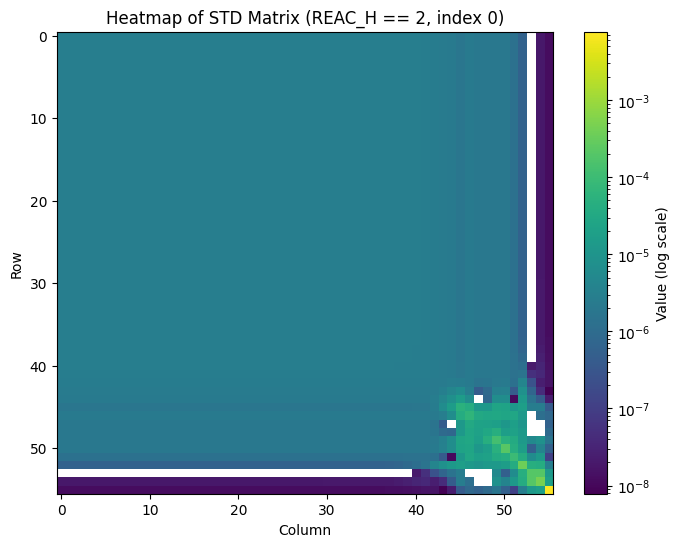

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

# Extract the matrix data from the specified cell
matrix = df[df['REAC_H'] == 2]['STD'].iloc[0]


plt.figure(figsize=(8, 6))
im = plt.imshow(matrix, cmap='viridis', aspect='auto', 
                norm=LogNorm())  # Using LogNorm for logarithmic scale
plt.colorbar(im, label='Value (log scale)')
plt.title('Heatmap of STD Matrix (REAC_H == 2, index 0)')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

In [ ]:
df[df['REAC_H'] == 4]

,ISO_H,REAC_H,ISO_V,REAC_V,STD
8,8016,4,8016,4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,8016,4,8016,16,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10,8016,4,8016,22,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
11,8016,4,8016,23,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
12,8016,4,8016,28,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
13,8016,4,8016,102,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14,8016,4,8016,108,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [ ]:
for i, list in enumerate(df[df['REAC_H'] == 4]['STD'][6]):
    print(f"{i}: {list}") 

KeyError: 6